# Get location of UTAM

In [23]:
import geopandas as geop
import seaborn as sns

In [29]:
sns.set(rc={"figure.figsize": (8, 4)})
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 5]
plt.rcParams['figure.dpi'] = 150

In [45]:
utam = geop.read_file('../data/01_raw/movilidad/ZONAS/utam.shx')
utam.columns = [c.lower() for c in utam.columns]
utam.head()

muncodigo munnombre    locnombre  usosnum  usoprenum             usoprecor  \
0    11001.0    BOGOTA  TEUSAQUILLO  12345.0        1.0           RESIDENCIAL   
1    11001.0    BOGOTA      KENNEDY  12345.0        2.0  COMERCIO Y SERVICIOS   
2    11001.0    BOGOTA  TEUSAQUILLO   1234.0        1.0           RESIDENCIAL   
3    11001.0    BOGOTA  TEUSAQUILLO  12345.0        1.0           RESIDENCIAL   
4    11001.0    BOGOTA     SANTA FE  12345.0        2.0  COMERCIO Y SERVICIOS   

  estrato1 estrato2 estrato3 estrato4 estrato5 estrato6  estratopre  hogares  \
0       NO       NO       SI       SI       NO       NO         4.0  14357.0   
1       SI       SI       NO       NO       NO       NO         2.0   3978.0   
2       NO       SI       SI       SI       NO       NO         4.0  10092.0   
3       NO       SI       SI       SI       NO       NO         4.0  10433.0   
4       SI       NO       SI       SI       NO       NO         1.0   2421.0   

      utam       utamnombre      utamarea  \
0  UTAM100         GALERIAS  2.372501e+06   
1   UTAM83   LAS MARGARITAS  1.470364e+06   
2  UTAM107   QUINTA PAREDES  1.737216e+06   
3  UTAM101      TEUSAQUILLO  2.353852e+06   
4   UTAM91  SAGRADO CORAZON  1.459944e+06   

                                            geometry  
0  POLYGON ((-74.06463 4.64965, -74.06619 4.64146...  
1  POLYGON ((-74.17077 4.62848, -74.17141 4.62811...  
2  POLYGON ((-74.09245 4.63648, -74.09184 4.63569...  
3  POLYGON ((-74.06707 4.63644, -74.06840 4.62882...  
4  POLYGON ((-74.05722 4.62403, -74.05719 4.62404...

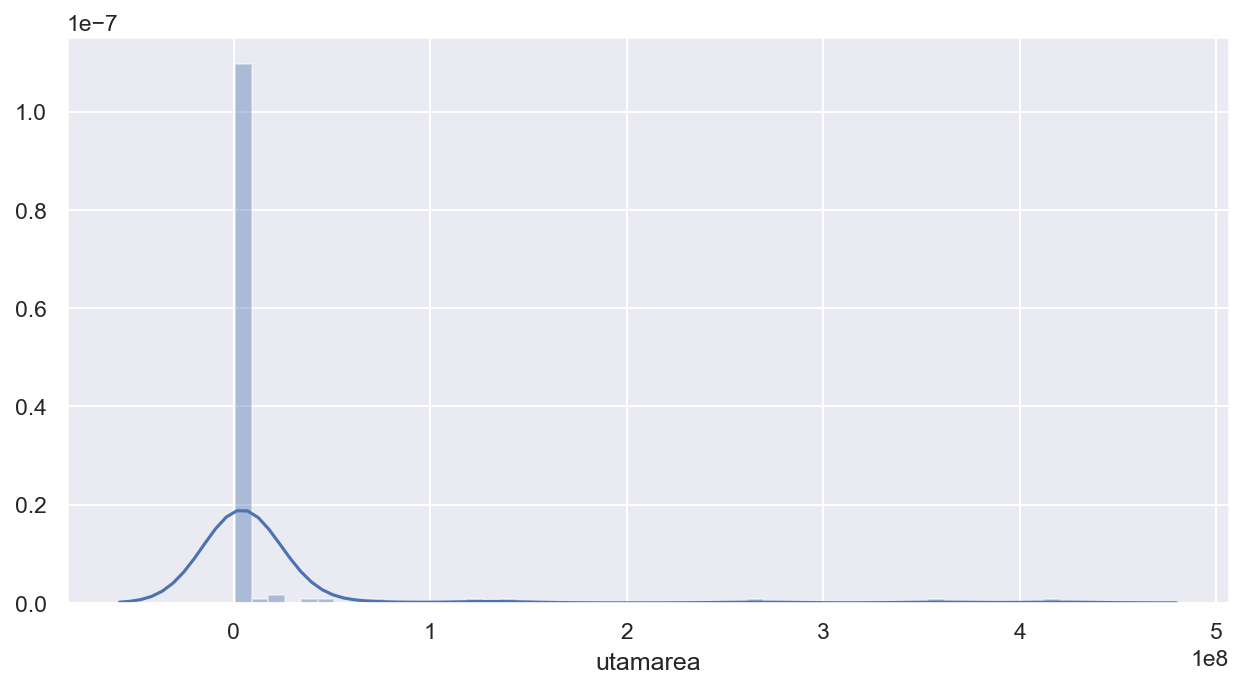

In [47]:
sns.distplot(utam.utamarea)

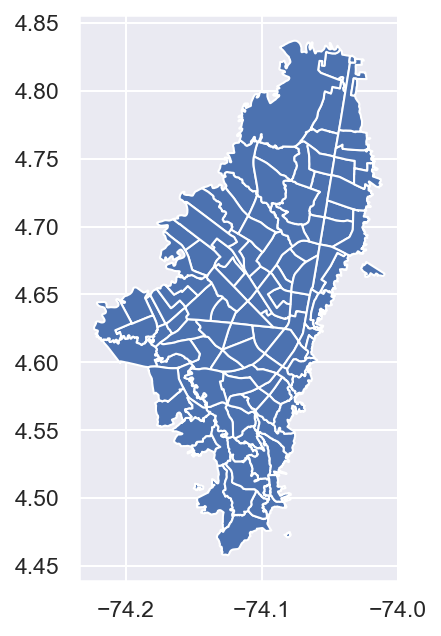

In [49]:
# only bogota and only metropolitan area
utam = utam.loc[lambda x:(x.munnombre=='BOGOTA') & (x.utamarea<1e8)]

utam.plot()

In [50]:
#centroides de cada UTAM
utam['centroide'] = utam.geometry.centroid

<ipython-input-50-657a51919e92>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  utam['centroide'] = utam.geometry.centroid


Saquemos los centroides para analisis rapido junto con los otros datasets

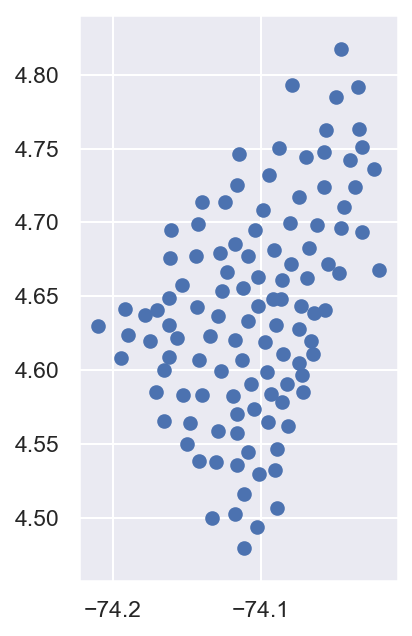

In [51]:
utam.assign(geometry=utam.centroide).plot()

In [52]:
utam.to_pickle('../data/02_processed/utam.pkl')

In [53]:
utam.head()

muncodigo munnombre    locnombre  usosnum  usoprenum             usoprecor  \
0    11001.0    BOGOTA  TEUSAQUILLO  12345.0        1.0           RESIDENCIAL   
1    11001.0    BOGOTA      KENNEDY  12345.0        2.0  COMERCIO Y SERVICIOS   
2    11001.0    BOGOTA  TEUSAQUILLO   1234.0        1.0           RESIDENCIAL   
3    11001.0    BOGOTA  TEUSAQUILLO  12345.0        1.0           RESIDENCIAL   
4    11001.0    BOGOTA     SANTA FE  12345.0        2.0  COMERCIO Y SERVICIOS   

  estrato1 estrato2 estrato3 estrato4 estrato5 estrato6  estratopre  hogares  \
0       NO       NO       SI       SI       NO       NO         4.0  14357.0   
1       SI       SI       NO       NO       NO       NO         2.0   3978.0   
2       NO       SI       SI       SI       NO       NO         4.0  10092.0   
3       NO       SI       SI       SI       NO       NO         4.0  10433.0   
4       SI       NO       SI       SI       NO       NO         1.0   2421.0   

      utam       utamnombre      utamarea  \
0  UTAM100         GALERIAS  2.372501e+06   
1   UTAM83   LAS MARGARITAS  1.470364e+06   
2  UTAM107   QUINTA PAREDES  1.737216e+06   
3  UTAM101      TEUSAQUILLO  2.353852e+06   
4   UTAM91  SAGRADO CORAZON  1.459944e+06   

                                            geometry  \
0  POLYGON ((-74.06463 4.64965, -74.06619 4.64146...   
1  POLYGON ((-74.17077 4.62848, -74.17141 4.62811...   
2  POLYGON ((-74.09245 4.63648, -74.09184 4.63569...   
3  POLYGON ((-74.06707 4.63644, -74.06840 4.62882...   
4  POLYGON ((-74.05722 4.62403, -74.05719 4.62404...   

                   centroide  
0  POINT (-74.07275 4.64354)  
1  POINT (-74.17835 4.63711)  
2  POINT (-74.08954 4.63072)  
3  POINT (-74.07392 4.62796)  
4  POINT (-74.06594 4.61988)